# MNIST - BaseModel

Here we are trying to learn basics of deep learning with image classification as an example.

## Load some dataset

For first, we need a dataset. For that, we are going to use the `MNIST` dataset. (Acutally we are using a subset of that)

In [1]:
from fastai2.vision.all import *
from utils import *

matplotlib.rc('image', cmap='Greys')

In [2]:
images_path = untar_data(URLs.MNIST_SAMPLE)
images_path

Path('/storage/data/mnist_sample')

In [3]:
images_path.ls()

(#3) [Path('/storage/data/mnist_sample/labels.csv'),Path('/storage/data/mnist_sample/valid'),Path('/storage/data/mnist_sample/train')]

In [4]:
(images_path/"train").ls()

(#2) [Path('/storage/data/mnist_sample/train/7'),Path('/storage/data/mnist_sample/train/3')]

In [5]:
(images_path/"train"/"3").ls()

(#6131) [Path('/storage/data/mnist_sample/train/3/26208.png'),Path('/storage/data/mnist_sample/train/3/12882.png'),Path('/storage/data/mnist_sample/train/3/58219.png'),Path('/storage/data/mnist_sample/train/3/13242.png'),Path('/storage/data/mnist_sample/train/3/53225.png'),Path('/storage/data/mnist_sample/train/3/51947.png'),Path('/storage/data/mnist_sample/train/3/57974.png'),Path('/storage/data/mnist_sample/train/3/9812.png'),Path('/storage/data/mnist_sample/train/3/6658.png'),Path('/storage/data/mnist_sample/train/3/11285.png')...]

In [6]:
three_paths = (images_path/"train"/"3").ls().sorted()
seven_paths = (images_path/"train"/"7").ls().sorted()

In [7]:
seven_paths

(#6265) [Path('/storage/data/mnist_sample/train/7/10002.png'),Path('/storage/data/mnist_sample/train/7/1001.png'),Path('/storage/data/mnist_sample/train/7/10014.png'),Path('/storage/data/mnist_sample/train/7/10019.png'),Path('/storage/data/mnist_sample/train/7/10039.png'),Path('/storage/data/mnist_sample/train/7/10046.png'),Path('/storage/data/mnist_sample/train/7/10050.png'),Path('/storage/data/mnist_sample/train/7/10063.png'),Path('/storage/data/mnist_sample/train/7/10077.png'),Path('/storage/data/mnist_sample/train/7/10086.png')...]

In [8]:
im_seven = Image.open(seven_paths[10])
im_seven

## Converting Image into Data

To do something interesting, we need to convert these images into data.

In [9]:
## This is the numpy array.
array(im_seven).shape

(28, 28)

In [10]:
## This is same thing but with pytorch. So, we will be using that from now on.
tsr_seven = tensor(im_seven)
tsr_seven.shape

torch.Size([28, 28])

In [11]:
## This image is 2 dimention array (or a 2D matrix)
## Let's play with that.

In [12]:
# This is the 10th row
tsr_seven[9,:]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,  15,  89, 254, 254, 254, 197,  32,   0,   0,   0,  76, 254, 140,   0,   0,   0,   0,   0,   0,   0], dtype=torch.uint8)

In [13]:
# This the 15th column
tsr_seven[:, 14]

tensor([  0,   0,   0,   0,   0,   0,   0,  98, 249,  32,   0,   0,   0,   0,   0,   0, 127, 244, 254, 235, 102,  18,   0,   0,   0,   0,   0,   0], dtype=torch.uint8)

In [14]:
# This is rows 10 and 11
tsr_seven[9:11, :]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,  15,  89, 254, 254, 254, 197,  32,   0,   0,   0,  76, 254, 140,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  15, 155, 254, 254, 187,  32,   5,   0,   0,   0,  15, 197, 243,  34,   0,   0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [15]:
# This is rows 10 to 12 and colum 10 to 15
tsr_seven[9:11, 9:14]

tensor([[ 89, 254, 254, 254, 197],
        [254, 254, 187,  32,   5]], dtype=torch.uint8)

In [16]:
# Let's visualize one of those tensors
show_image(tsr_seven[:, 10:15])

## Baseline Model

Here our idea is to create a model to detect 3 and 7 from our dataset. Before we are trying to do anything fancy, we need to create easy to create model. It should easy to create.

Then we can compare our future fancy model with this baseline and see whether it's an improvement or not.

In [17]:
lst_threes = [tensor(Image.open(p)) for p in three_paths]
lst_sevens = [tensor(Image.open(p)) for p in seven_paths]

In [18]:
lst_threes[1].shape

torch.Size([28, 28])

As you see the output is a list of tensors. 

**But in order to work with pytorch, we need to get convert them into a tensor.**

In [19]:
## We also make those values from 0-1 range. That's the usual way we work with images.
tsr_threes = torch.stack(lst_threes).float()/255
tsr_sevens = torch.stack(lst_sevens).float()/255

In [20]:
tsr_sevens.shape

torch.Size([6265, 28, 28])

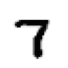

In [21]:
show_image(tsr_sevens[0])

As you can see, now we moved all of our images into a tensor. So, we can work on it.

### Mean Image

In order to finish our baseline model, we will be get the mean of these stackes images and compare them with each of the image.

So, first we need to get the mean image. Here's how we do that

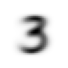

In [22]:
tsr_mean_threes = tsr_threes.mean(0)
show_image(tsr_mean_threes)

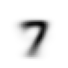

In [23]:
tsr_mean_sevens = tsr_sevens.mean(0)
show_image(tsr_mean_sevens)

## Predicting the Number

Now have stacked images of 3s, and 7s and we need to predict the number for a given image.
Let's pick one of the 3s.

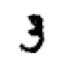

In [24]:
tsr_three = tsr_threes[0]
show_image(tsr_three)

### Loss Function

To do the prediction, we need to compare this image with the mean image. For that, we use a loss function. Simple pixel different won't work here due to positive and negative differences.

For these loss functions, we can think of two methods

1. Mean Absolute Difference (L1 norm)
2. Root Mean Squared Error (L2 norm)

In [25]:
## 1. ABS - L1 norm

loss_abs_for_three = (tsr_mean_threes - tsr_three).abs().mean()
loss_abs_for_seven = (tsr_mean_sevens - tsr_three).abs().mean()
loss_abs_for_three, loss_abs_for_seven

(tensor(0.1074), tensor(0.1441))

As you can see, this image has lower loss for three rather seven. **So, we can predict this number as a three.**

In [26]:
### 2. RMSE - L2 norm

loss_rmse_for_three = ((tsr_mean_threes - tsr_three) ** 2).mean().sqrt()
loss_rmse_for_seven = ((tsr_mean_sevens - tsr_three) ** 2).mean().sqrt()
loss_rmse_for_three, loss_rmse_for_seven

(tensor(0.1912), tensor(0.2780))

Even with **RMSE** it's closer to three. But in this time, the difference between two losses are grater than previous. 

**So, RMSE might be a good choice.**

### Using built-in pytorch goodies.

We can calculate above errors, very easily with pytorch's built-in functions.
Let's try those for just for three.

In [27]:
pt_loss_abs_for_three = F.l1_loss(tsr_mean_threes, tsr_three)
pt_loss_abs_for_three

tensor(0.1074)

In [28]:
pt_loss_rmse_for_three = F.mse_loss(tsr_mean_threes, tsr_three).sqrt()
pt_loss_rmse_for_three

tensor(0.1912)

As we expected, they are the same.

## Learn Some pyTorch Goodies

Before we go further, we need to experiment with some pytorch goodies, we will be using next in this lesson.
Those are:

1. Broadcasting
2. Tensor Dimensions

### Broadcasting

We can do basic arithmatics even if the right hand side tensor's dimensions are different

In [39]:
a = tensor([10, 20])
b = tensor(5)
a + b

tensor([15, 25])

In [40]:
a = tensor([
    [10, 20],
    [100, 200]
])
b = tensor(5)
a + b

tensor([[ 15,  25],
        [105, 205]])

In [43]:
a = tensor([
    [10, 20],
    [100, 200]
])
b = tensor([5, 1])
a + b

tensor([[ 15,  21],
        [105, 201]])

### Tensor Dimensions

It's very important to understand what tensor dimensions inorder to work with different operations into them.
[This article](https://towardsdatascience.com/understanding-dimensions-in-pytorch-6edf9972d3be) helps a lot.

In [99]:
a = tensor(
[
    [
        [10, 20, 30],
        [100, 200, 300]
    ],
    
    [
        [10, 20, 30],
        [100, 200, 300]
    ]
]
).float()
a.shape

torch.Size([2, 2, 3])

In [119]:
a.sum((2))

tensor([[ 60., 600.],
        [ 60., 600.]])

In [115]:
a.sum((2, 0))

tensor([ 120., 1200.])

In [116]:
a.sum((0))

tensor([[ 20.,  40.,  60.],
        [200., 400., 600.]])

In [117]:
a.sum((0, 2))

tensor([ 120., 1200.])

## MNIST Accuracy

Now we know how to work with the loss function. But we cannot use that loss function to asset the model over a set of images. What we need is accuracy.

This is something used in common for classification related models.


In [155]:
## Let's load our validation images
tsr_valid_threes = torch.stack([tensor(Image.open(im)).float()/255 for im in (images_path/"valid"/"3").ls()])
tsr_valid_sevens = torch.stack([tensor(Image.open(im)).float()/255 for im in (images_path/"valid"/"7").ls()])
tsr_valid_threes.shape, tsr_valid_sevens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [188]:
def find_threes_accuracy():
    loss_threes = ((tsr_valid_threes - tsr_mean_threes)**2).mean((1, 2)).sqrt();
    loss_sevens = ((tsr_valid_threes - tsr_mean_sevens)**2).mean((1, 2)).sqrt();
    
    is_three = loss_threes < loss_sevens
    accuracy = (torch.sum(is_three == True).float() / len(is_three)) * 100.0
    
    return accuracy
    
print(find_threes_accuracy())

tensor(95.8416)


In [190]:
def find_sevens_accuracy():
    loss_threes = ((tsr_valid_sevens - tsr_mean_threes)**2).mean((1, 2)).sqrt();
    loss_sevens = ((tsr_valid_sevens - tsr_mean_sevens)**2).mean((1, 2)).sqrt();
    
    is_three = loss_threes < loss_sevens
    accuracy = (torch.sum(is_three == False).float() / len(is_three)) * 100.0
    
    return accuracy
    
print(find_sevens_accuracy())

tensor(97.3735)


In [215]:
## Let's generalize both of the above functions

def find_accuracy_with_l1(tsr_input, expected_is_three):
    loss_threes = (tsr_input - tsr_mean_threes).abs().mean((1, 2));
    loss_sevens = (tsr_input - tsr_mean_sevens).abs().mean((1, 2));
    
    is_three = loss_threes < loss_sevens
    accuracy = (torch.sum(is_three == expected_is_three).float() / len(is_three)) * 100.0
    
    return accuracy

def find_accuracy_with_l2(tsr_input, expected_is_three):
    loss_threes = ((tsr_input - tsr_mean_threes)**2).mean((1, 2)).sqrt();
    loss_sevens = ((tsr_input - tsr_mean_sevens)**2).mean((1, 2)).sqrt();
    
    is_three = loss_threes < loss_sevens
    accuracy = (torch.sum(is_three == expected_is_three).float() / len(is_three)) * 100.0
    
    return accuracy

In [220]:
acc_threes = find_accuracy_with_l1(tsr_valid_threes, True)
acc_sevens = find_accuracy_with_l1(tsr_valid_sevens, False)
acc_threes, acc_sevens

(tensor(91.6832), tensor(98.5409))

In [221]:
overall_accuracy = (acc_threes + acc_sevens)/2
overall_accuracy

tensor(95.1120)

As we can see, our model is very good for comparing 3 and 7 even with the very simple basemodel.
But 3 and 7 are very different letters. 

It's very interesting to compare these with 3 and 8 with this model.